Exploratory Data Analysis: Air Quality and Weather Data
Project Description:
This notebook performs exploratory data analysis (EDA) on air quality and weather data for the Phoenix-Mesa-Scottsdale area. The analysis aims to uncover trends, relationships, and insights that inform feature engineering and model selection for anomaly detection and forecasting.

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import zscore

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")


In [3]:
import pandas as pd

df = pd.read_csv(r".\data\raw_dataset.csv")

print(df.head())
print(df.shape)

     id        date  overall_aqi_value main_pollutant          site_name  \
0  2038  2022-07-31                 84          Ozone               MESA   
1  2397  2023-07-25                129          Ozone               MESA   
2     1  2017-01-01                 58          PM2.5             Diablo   
3     2  2017-01-02                 44          Ozone  HUMBOLDT MOUNTAIN   
4     3  2017-01-03                 61          PM2.5    DURANGO COMPLEX   

       site_id source  co  ozone  pm10  pm25  no2  temperature  precipitation  \
0  04-013-1003    AQS   5     84    52    43   18         30.9            0.0   
1  04-013-1003    AQS   5    129    61    48   39         40.2            0.0   
2  04-013-4019    AQS   6     39    11    58   27         13.3            5.1   
3  04-013-9508    AQS  10     44    22    39   39         11.5            0.0   
4  04-013-9812    AQS  13     44    28    61   39         11.2            0.0   

   wind_speed  
0        14.0  
1        11.9  
2       

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df.describe(include='all'))

df.isnull().sum()

df.drop_duplicates(inplace=True)

                 id                 date  overall_aqi_value main_pollutant  \
count   2556.000000                 2556        2556.000000           2556   
unique          NaN                  NaN                NaN              4   
top             NaN                  NaN                NaN          Ozone   
freq            NaN                  NaN                NaN           1217   
mean    1278.500000  2020-07-01 12:00:00         103.730438            NaN   
min        1.000000  2017-01-01 00:00:00          30.000000            NaN   
25%      639.750000  2018-10-01 18:00:00          67.000000            NaN   
50%     1278.500000  2020-07-01 12:00:00          86.000000            NaN   
75%     1917.250000  2022-04-01 06:00:00         115.000000            NaN   
max     2556.000000  2023-12-31 00:00:00        1194.000000            NaN   
std      737.997967                  NaN          75.019260            NaN   

            site_name      site_id source           co        o

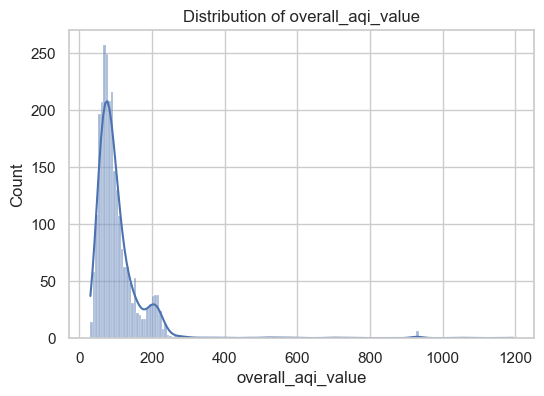

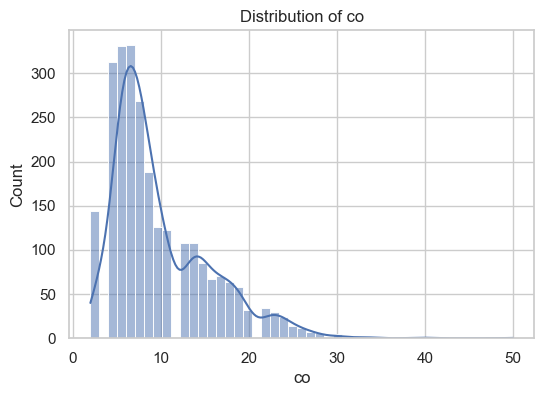

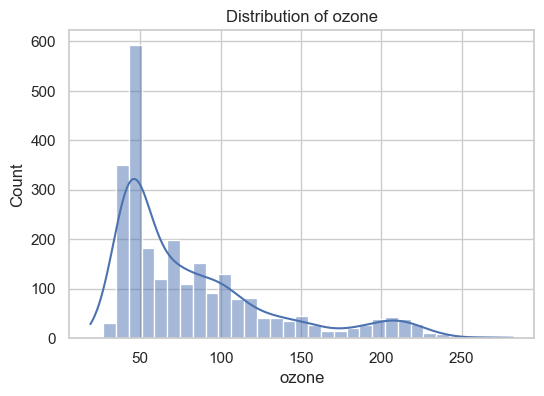

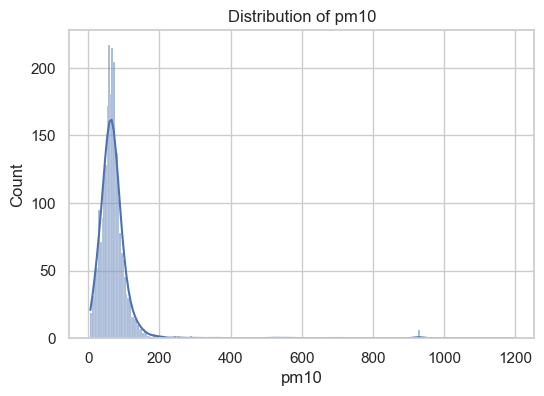

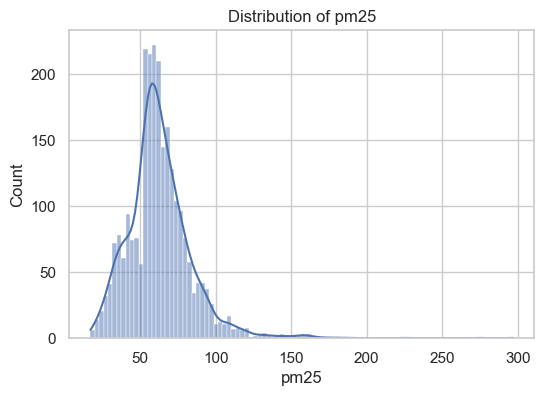

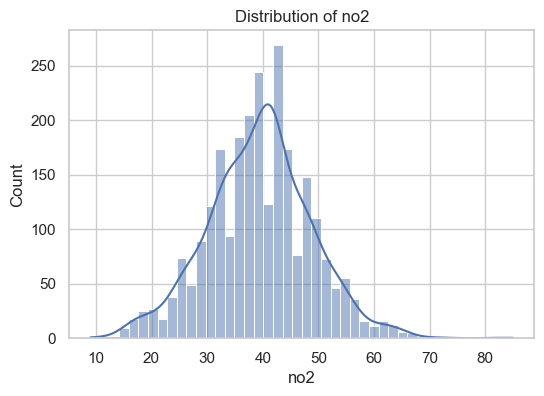

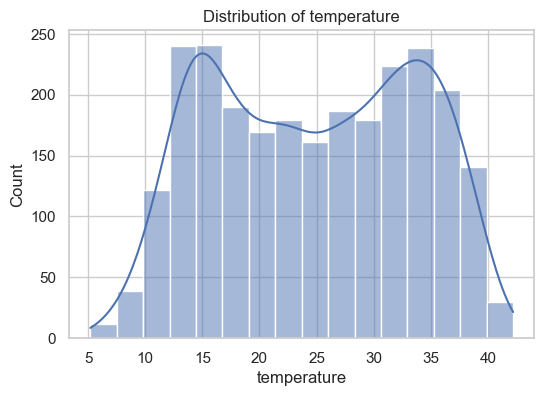

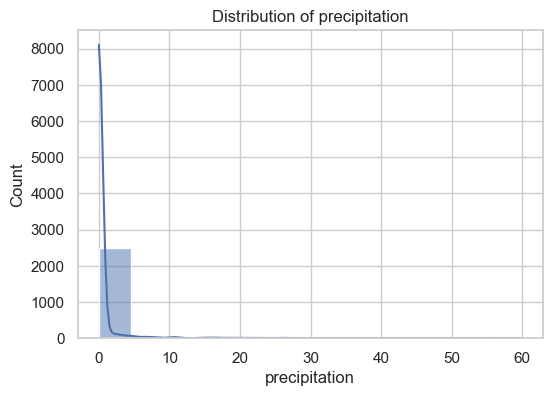

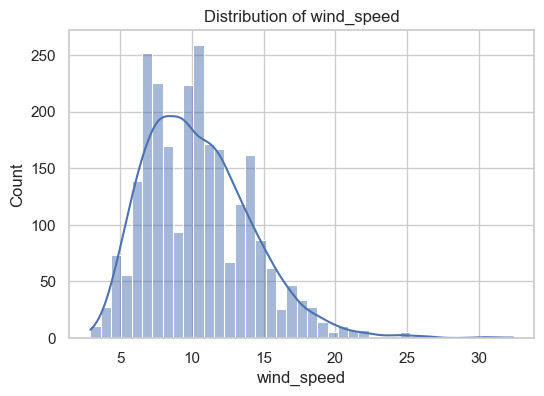

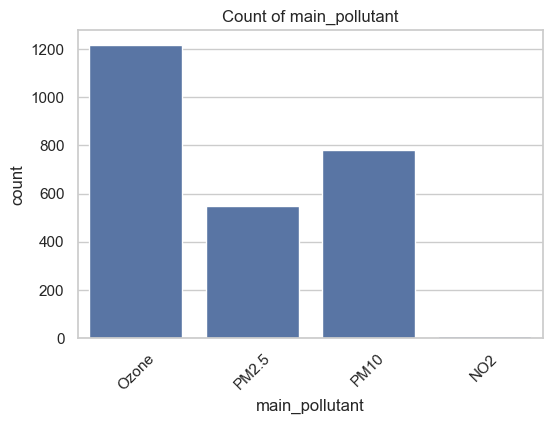

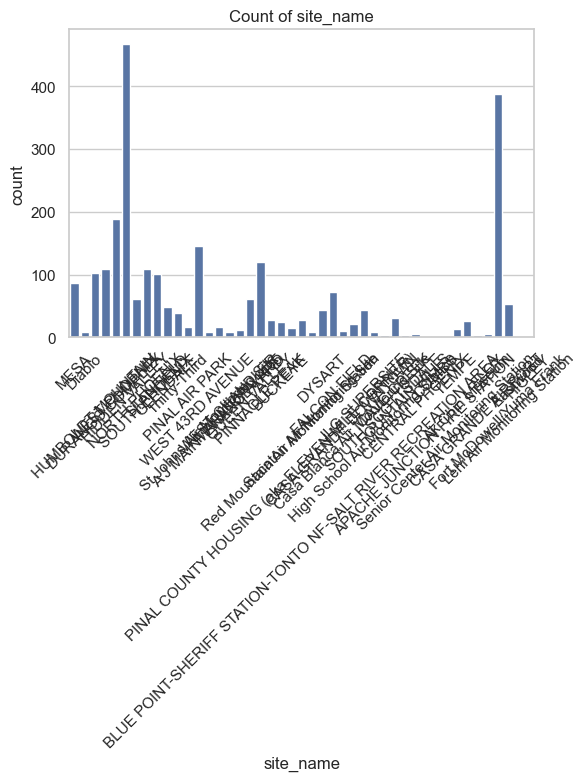

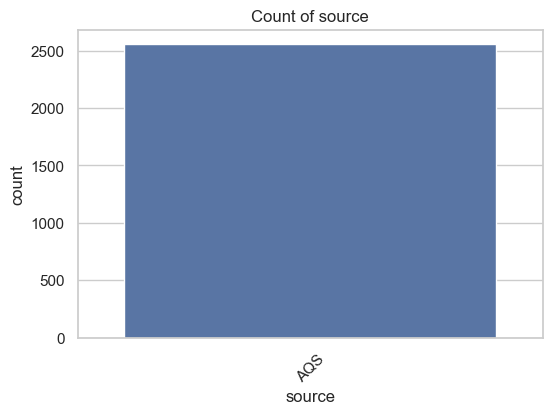

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['overall_aqi_value', 'co', 'ozone', 'pm10', 'pm25',
                'no2', 'temperature', 'precipitation', 'wind_speed']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True)  # or sns.kdeplot
    plt.title(f'Distribution of {col}')
    plt.show()

for col in ['main_pollutant', 'site_name', 'source']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

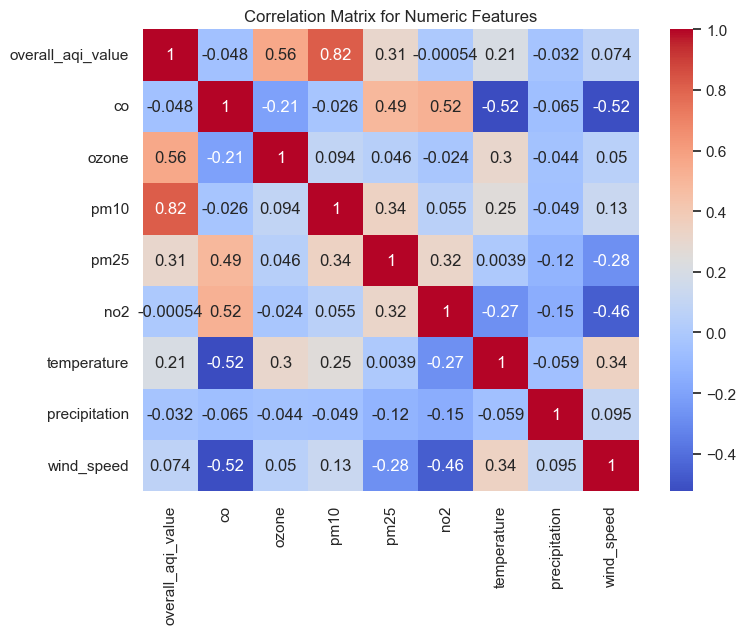

C:\Users\advai\Anaconda3\envs\sentiment_analysis_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


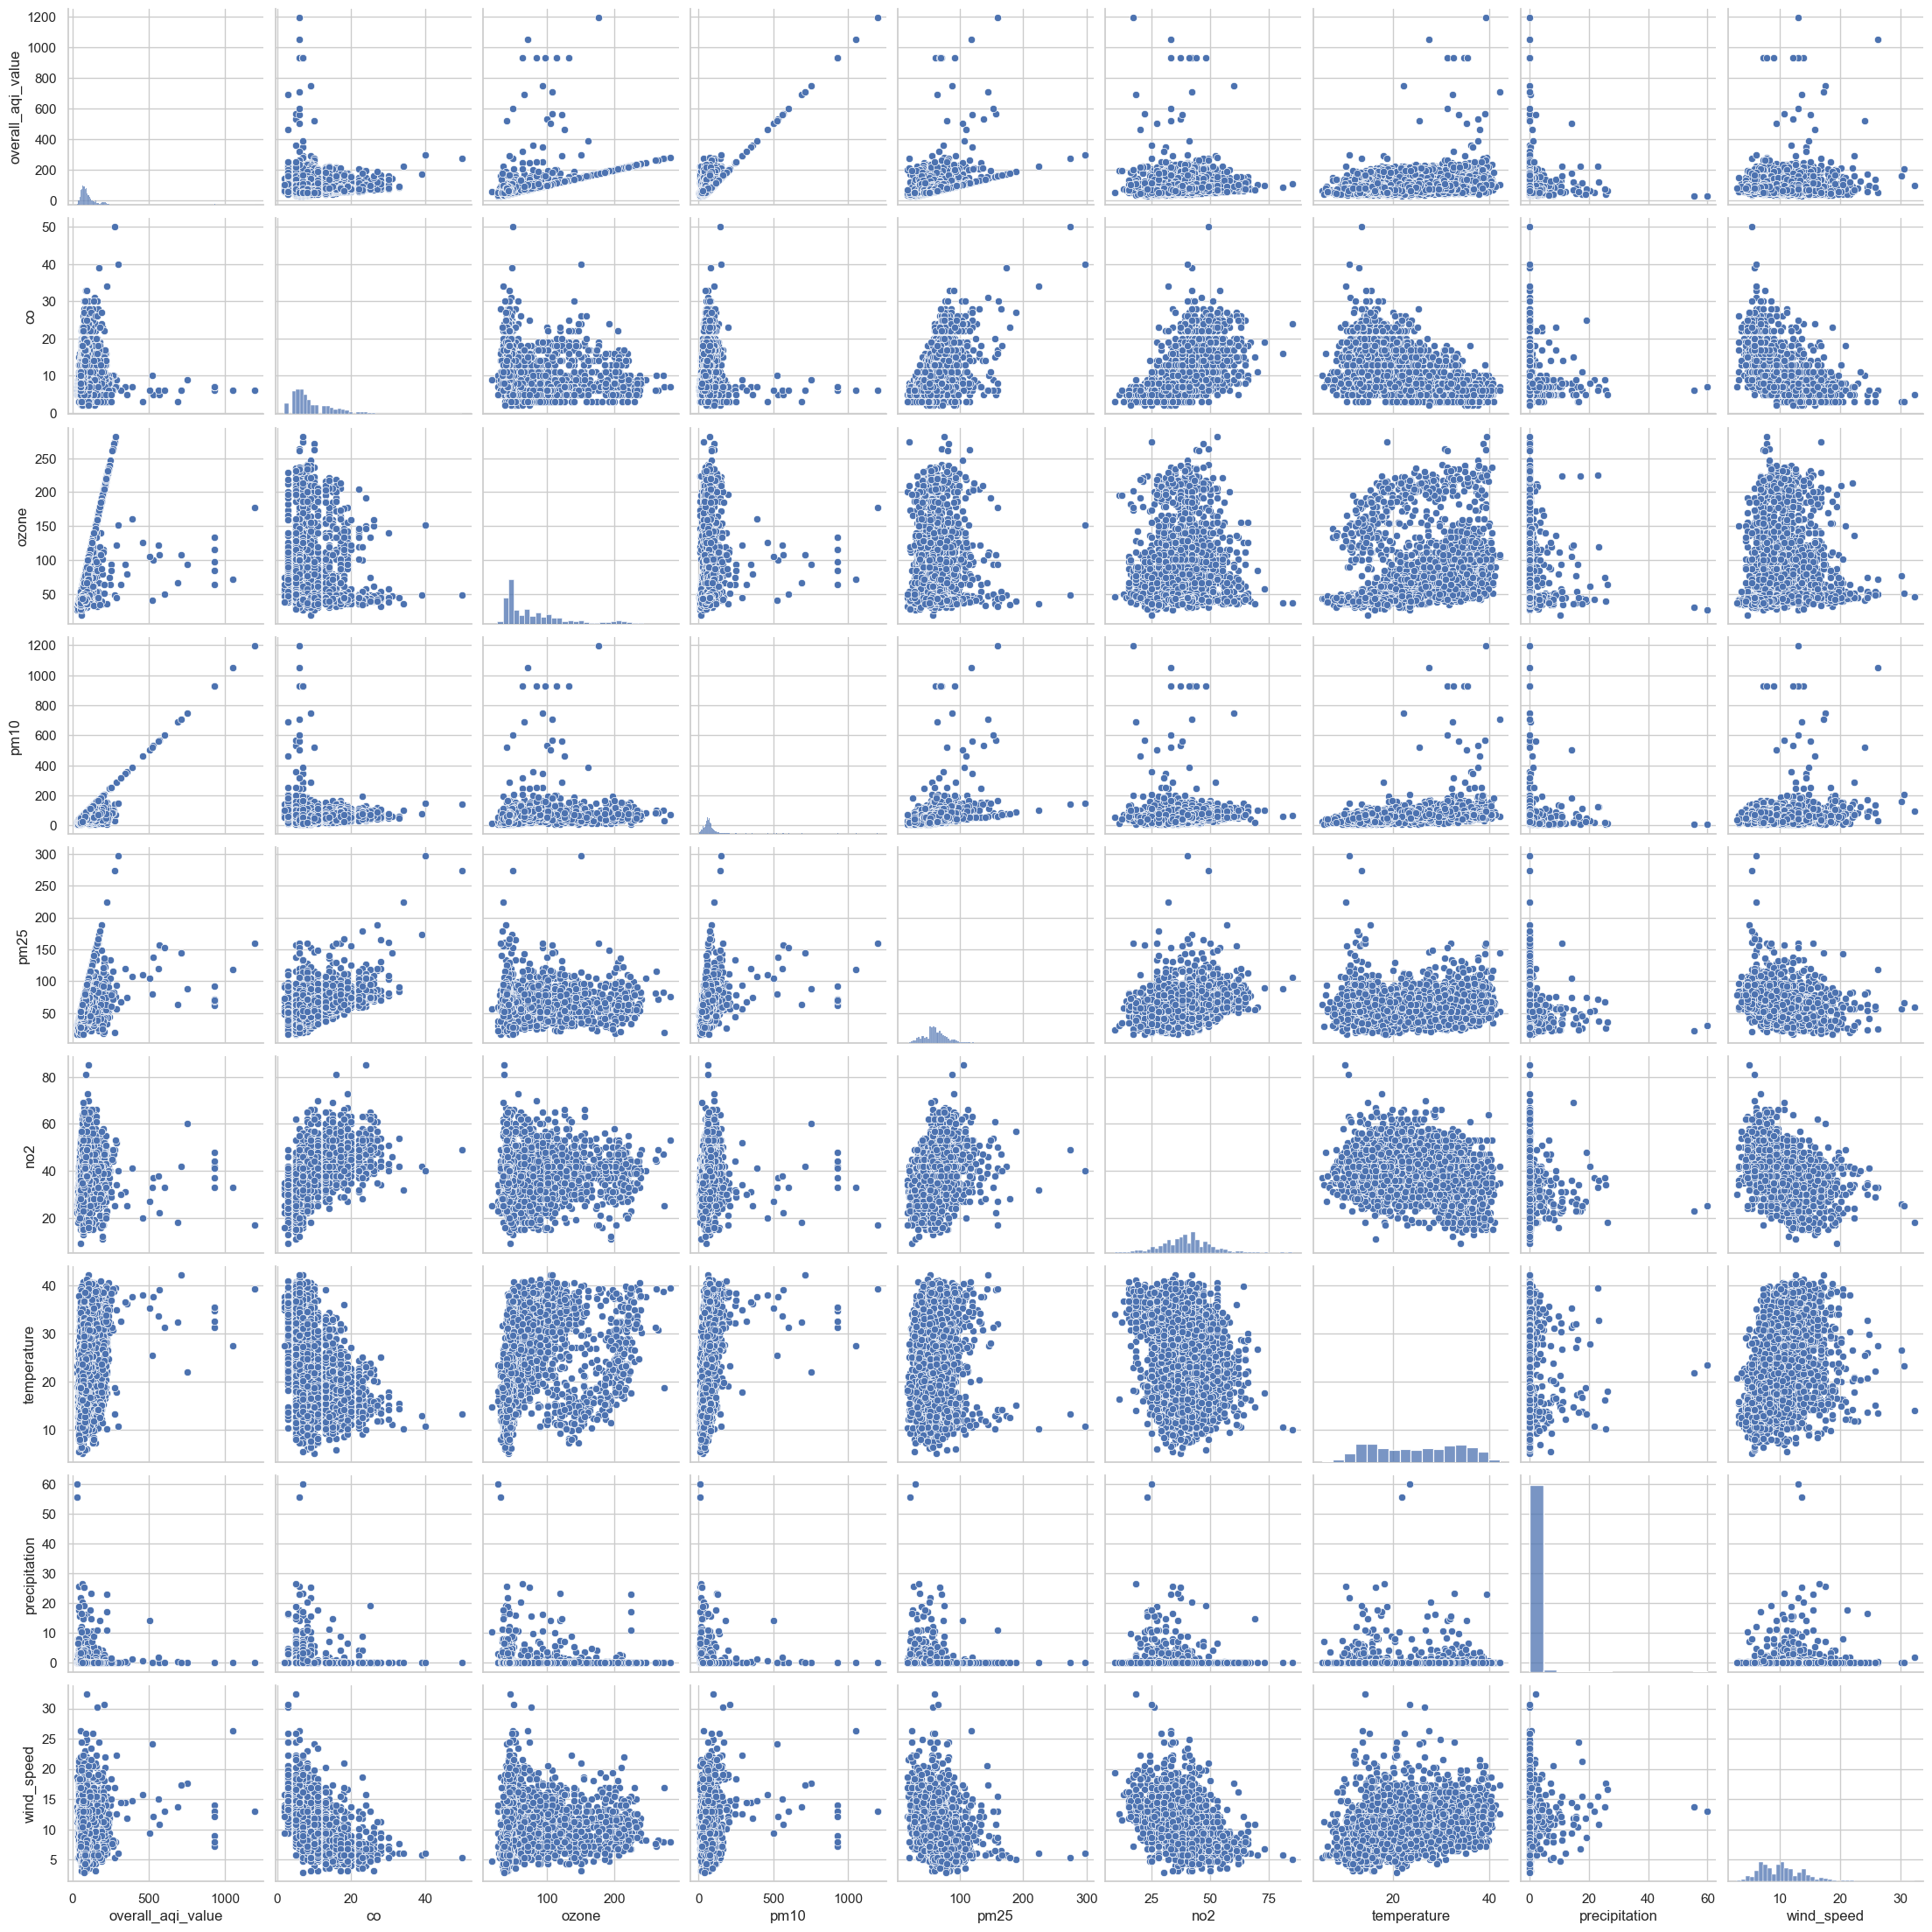

,pm25,ozone,pm10,co
site_name,,,,
ELOY,75.000000,70.600000,385.400000,9.000000
APACHE JUNCTION FIRE STATION,74.500000,101.000000,207.000000,7.500000
SOUTH PHOENIX,74.348624,45.715596,44.275229,13.688073
WEST PHOENIX,74.037037,48.804233,49.000000,16.428571
HIDDEN VALLEY,72.807281,61.972163,89.152034,10.411135
Thirty-Third,71.743590,42.410256,51.974359,15.923077
DURANGO COMPLEX,69.715596,42.669725,57.284404,15.146789
CASA GRANDE DOWNTOWN,65.300000,53.900000,64.600000,9.300000
MARICOPA 1405,64.083333,78.583333,153.833333,6.916667


In [6]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Features")
plt.show()

sns.pairplot(df[numeric_cols])
plt.show()

df.groupby('main_pollutant')['overall_aqi_value'].describe()

df.groupby('site_name')[['pm25', 'ozone', 'pm10', 'co']].mean().sort_values('pm25', ascending=False)

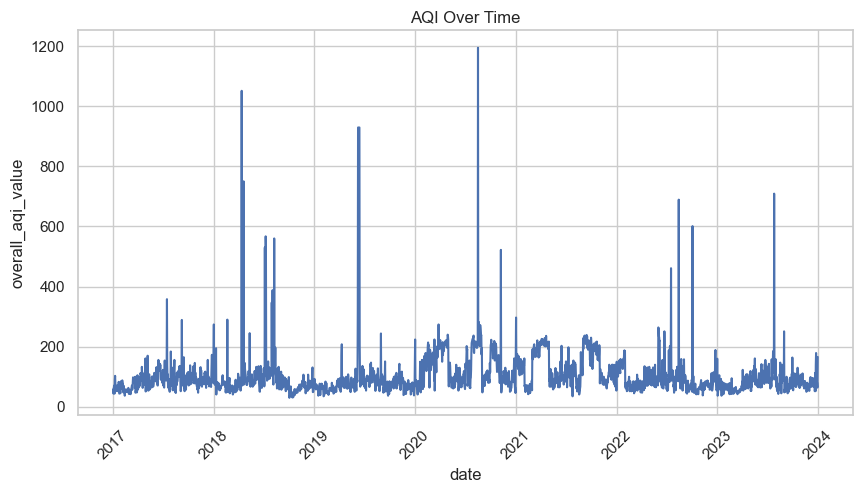

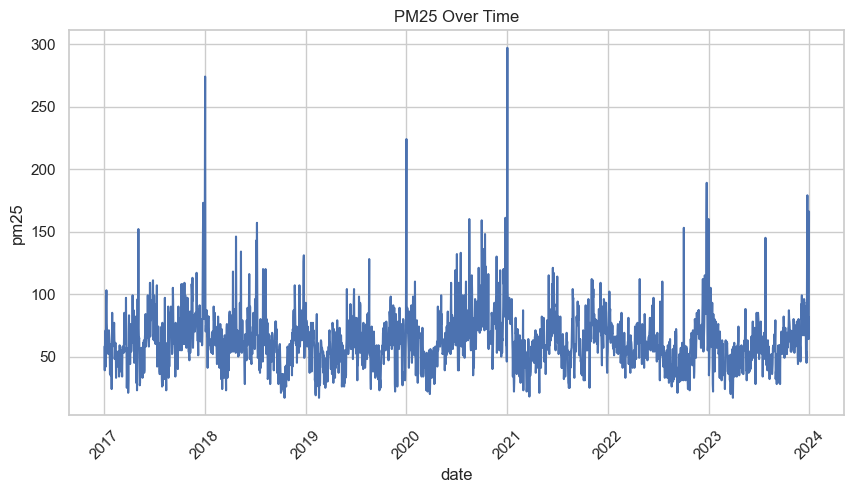

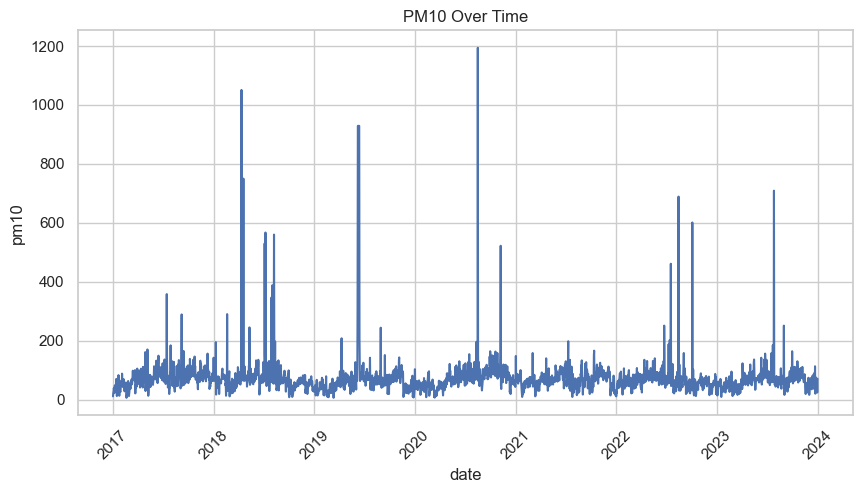

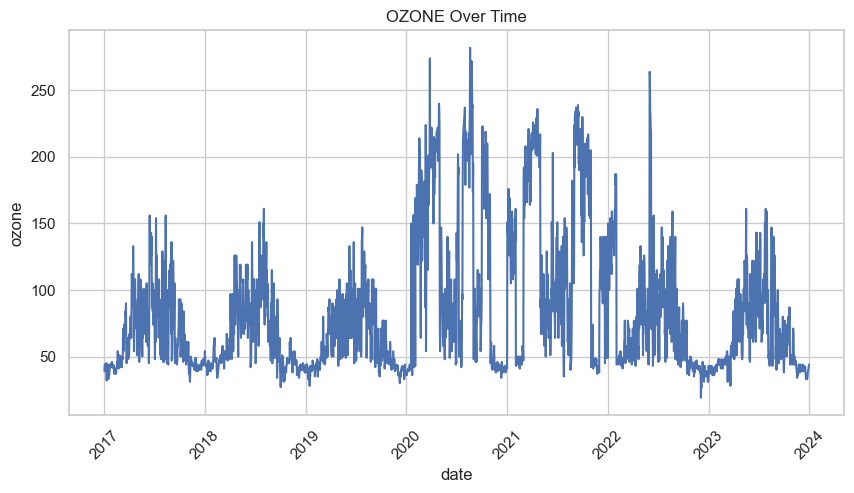

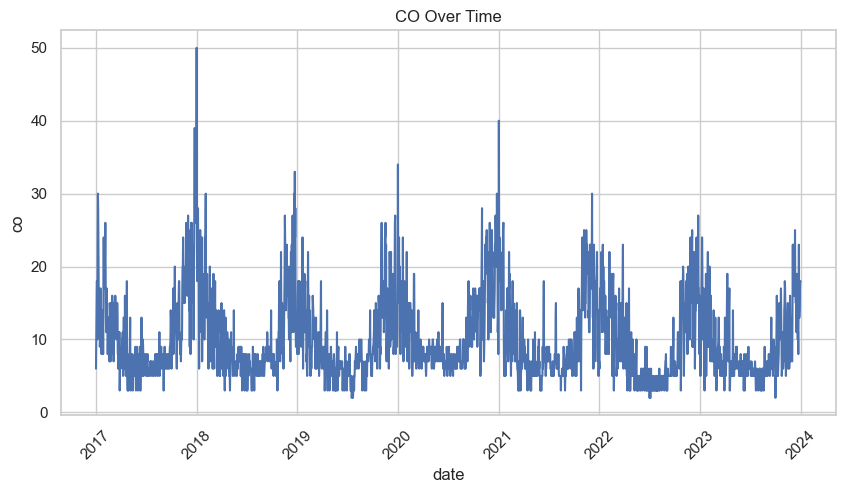

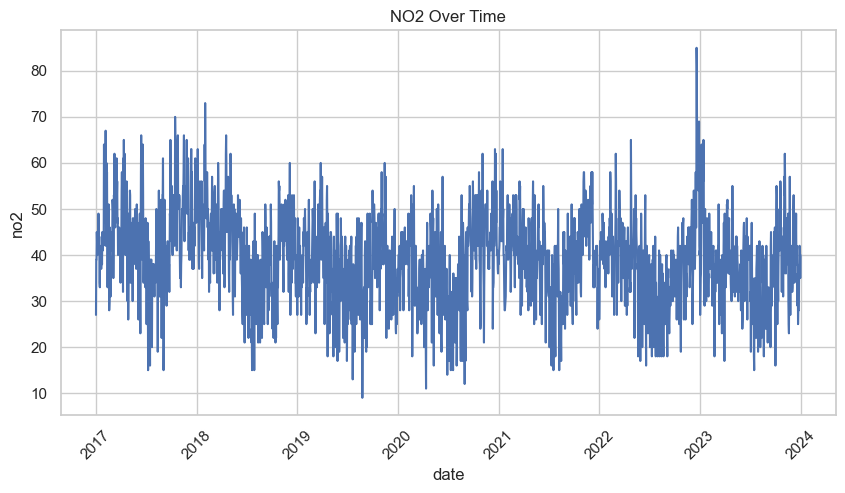

In [7]:
df_sorted = df.sort_values('date')  # ensure chronological order
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sorted, x='date', y='overall_aqi_value')
plt.title("AQI Over Time")
plt.xticks(rotation=45)
plt.show()

df_sorted['AQI_rolling_7d'] = df_sorted['overall_aqi_value'].rolling(7).mean()

pollutants = ['pm25', 'pm10', 'ozone', 'co', 'no2']
for p in pollutants:
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df_sorted, x='date', y=p)
    plt.title(f"{p.upper()} Over Time")
    plt.xticks(rotation=45)
    plt.show()

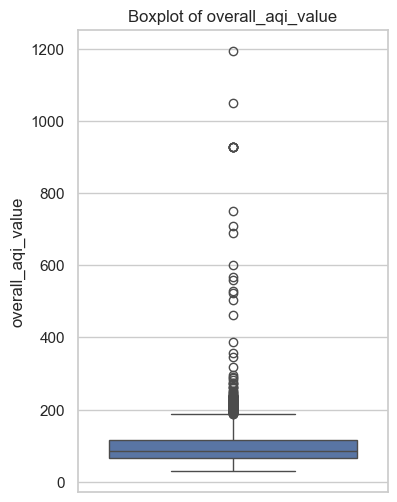

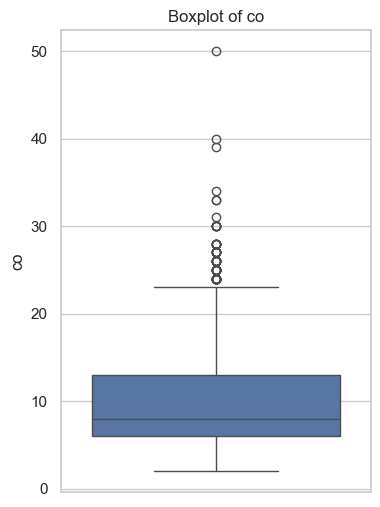

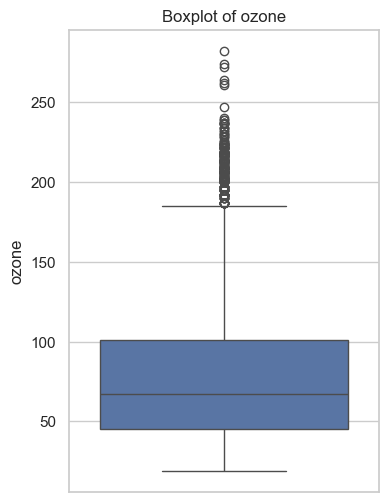

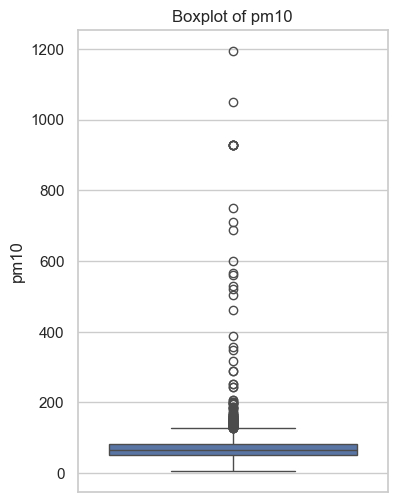

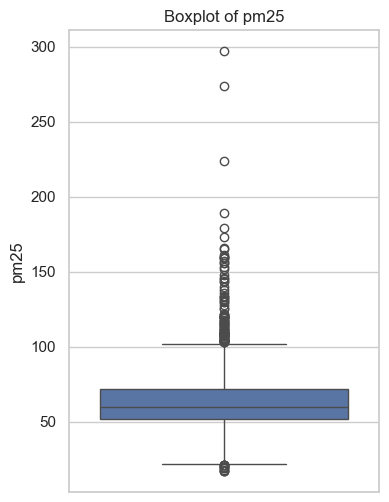

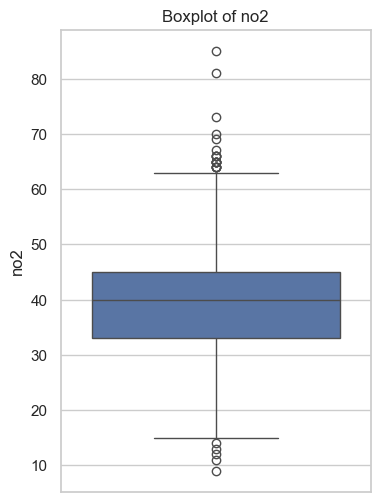

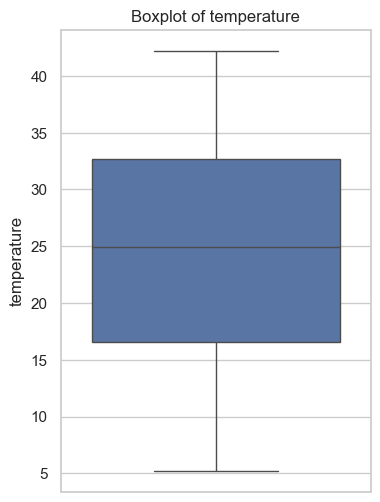

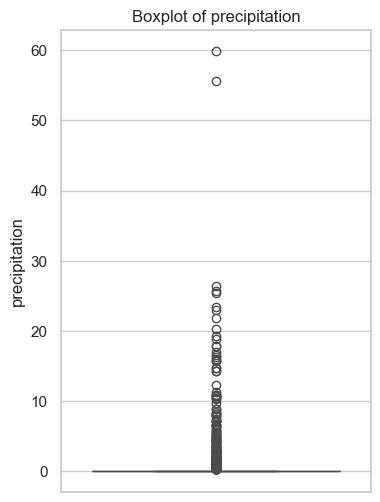

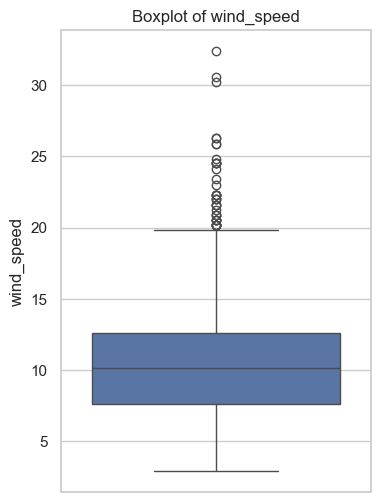

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

